In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data=pd.read_csv("prices-split-adjusted.csv")
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


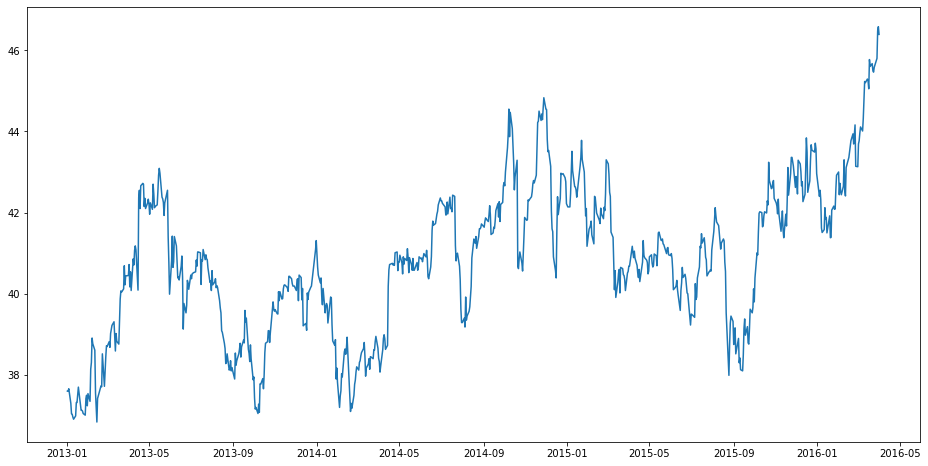

In [3]:
coca=data[data.symbol=='KO']
coca=coca[coca.date>"2013-01-01"]
coca=coca[coca.date<"2016-04-01"]
coca['date']=pd.to_datetime(coca.date)
coca.set_index('date',inplace=True)


plt.figure(figsize=(16,8))
plt.plot(coca['close'])

In [4]:
coca.dropna(inplace=True)

In [5]:
from ta import volume
from ta import trend
from ta import volatility
from ta import momentum


In [6]:
accumulation= volume.AccDistIndexIndicator(close=coca['close'],high=coca['high'],low=coca['low'],volume=coca['volume'])
avarge_directional_index=trend.ADXIndicator(close=coca['close'],high=coca['high'],low=coca['low'])
moving_avarge_covergence_divergance=trend.MACD(close=coca['close'])
relative_strength_index=momentum.RSIIndicator(close=coca['close'])
stochastic_oscilator=momentum.StochasticOscillator(close=coca['close'],high=coca['high'],low=coca['low'])
exponential_moving_avarge=trend.EMAIndicator(close=coca['close'])



In [7]:
coca['accumulation']=accumulation.acc_dist_index()
coca['ADX']=avarge_directional_index.adx()
coca['MACD']=moving_avarge_covergence_divergance.macd()
coca['RSI']=relative_strength_index.rsi()
coca['Stochastic Oscillator']=stochastic_oscilator.stoch()
coca['EMA']=exponential_moving_avarge.ema_indicator()


c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [8]:
coca.tail()

,symbol,open,close,low,high,volume,accumulation,ADX,MACD,RSI,Stochastic Oscillator,EMA
date,,,,,,,,,,,,
2016-03-24,KO,45.450001,45.580002,45.189999,45.599998,10890200.0,6.836076e+08,25.584362,0.609190,66.447690,84.285802,45.144285
2016-03-28,KO,45.560001,45.799999,45.509998,45.930000,13306600.0,6.886768e+08,26.200857,0.608833,68.739459,93.867874,45.231713
2016-03-29,KO,45.860001,46.480000,45.810001,46.509998,25010400.0,7.115436e+08,27.559611,0.655861,74.530387,98.648737,45.398151
2016-03-30,KO,46.630001,46.580002,46.330002,46.730000,14312200.0,7.151217e+08,29.071647,0.693209,75.256325,93.119361,45.555732
2016-03-31,KO,46.549999,46.389999,46.320000,46.880001,15544500.0,7.034633e+08,30.640012,0.699414,71.109268,78.969889,45.666967


In [9]:
coca= coca.drop(['symbol','high','open','low','volume'],axis=1)
coca.tail()

,close,accumulation,ADX,MACD,RSI,Stochastic Oscillator,EMA
date,,,,,,,
2016-03-24,45.580002,6.836076e+08,25.584362,0.609190,66.447690,84.285802,45.144285
2016-03-28,45.799999,6.886768e+08,26.200857,0.608833,68.739459,93.867874,45.231713
2016-03-29,46.480000,7.115436e+08,27.559611,0.655861,74.530387,98.648737,45.398151
2016-03-30,46.580002,7.151217e+08,29.071647,0.693209,75.256325,93.119361,45.555732
2016-03-31,46.389999,7.034633e+08,30.640012,0.699414,71.109268,78.969889,45.666967


In [14]:
coca.dropna(inplace=True)

In [15]:
X=[]
y=[]

prediction_days=30

days_to_predict=10

df_numpy=coca.to_numpy()

for i in range(len(df_numpy)):
    end= i + prediction_days
    out_end= end + days_to_predict
    
    if(out_end>len(df_numpy)):
       break
    
    X.append(df_numpy[i:end, :])
    y.append(df_numpy[end:out_end,0])

       
X,y= np.array(X), np.array(y)

In [16]:
X.shape

(753, 30, 7)

In [57]:
from sklearn import model_selection
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [23]:
X2=np.reshape(X,(753,210))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

In [44]:
kfold=model_selection.KFold(n_splits=5,shuffle=False)
grid1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    [{'polynomialfeatures__degree': [1,2,3]}],
                    cv=kfold,
                    refit=True,
                          n_jobs=10,
                         pre_dispatch=20)

grid1.fit(X_train,y_train)
grid1.best_params_

c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [  0.55633649 -17.5858115           nan]
  warnings.warn(


{'polynomialfeatures__degree': 1}

In [64]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
fold=model_selection.KFold(n_splits=5,shuffle=False)
grid2= RandomizedSearchCV(make_pipeline(PolynomialFeatures(degree=2),Lasso()),
                      [{'polynomialfeatures__degree':[1,2,3,4],'lasso__alpha':[0.05,0.1,0.7,1,5,0.5,10]}],
                     cv=kfold,refit=True,
                          n_jobs=10,
                         pre_dispatch=20)
grid2.fit(X_train,y_train)
grid2.best_params_

c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.6378785         nan        nan        nan 0.69987707
        nan 0.53506608 0.71679893        nan]
  warnings.warn(
c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.001517433229242, tolerance: 0.1693444928714257
  model = cd_fast.enet_coordinate_descent(
c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.165457780918382, tolerance: 0.17296557539507385
  model = cd_fast.enet_coordinate_descent(
c:\users\aczer\appdata\local\programs\pyt

{'polynomialfeatures__degree': 2, 'lasso__alpha': 0.5}

In [70]:
grid3= RandomizedSearchCV(make_pipeline(PolynomialFeatures(degree=2),ElasticNet()),
                      [{'polynomialfeatures__degree':[2,3],'elasticnet__alpha':[0.5,0.1,1,0.2,0.05]}],
                     cv=kfold,refit=True,
                          n_jobs=10,
                         pre_dispatch=20)
grid3.fit(X_train,y_train)
grid3.best_params_

c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.73582926        nan 0.76234886        nan 0.71679411        nan
 0.75494349        nan 0.76576431        nan]
  warnings.warn(
c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.374566595981105, tolerance: 0.1693444928714257
  model = cd_fast.enet_coordinate_descent(
c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8804961905960296, tolerance: 0.17296557539507385
  model = cd_fast.enet_coordinate_descent(
c:\users\aczer\appdata\local\programs\pyth

{'polynomialfeatures__degree': 2, 'elasticnet__alpha': 0.05}

In [58]:
grid4= RandomizedSearchCV(make_pipeline(PolynomialFeatures(degree=2),Ridge()),
                      [{'polynomialfeatures__degree':[1,2,3,4],'ridge__alpha':[0.01,0.1,1,4,10,20]}],
                     cv=kfold,refit=True,
                          n_jobs=10,
                         pre_dispatch=20)
grid4.fit(X_train,y_train)
grid4.best_params_

c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-11.12508367   0.65751703          nan -11.12508367          nan
          nan -11.12508367   0.68977485   0.70568381          nan]
  warnings.warn(
c:\users\aczer\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15121e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


{'ridge__alpha': 20, 'polynomialfeatures__degree': 1}

In [54]:
grid5= RandomizedSearchCV(RandomForestRegressor(),
                      [{'max_depth':[5,6,7,8,9,10,11,12,13],'n_estimators':[100,200,50,120,80,40,60,220,180,110,150,250]}],
                     cv=kfold,refit=True,
                          n_jobs=10,
                         pre_dispatch=20)
grid5.fit(X_train,y_train)
grid5.best_params_

{'n_estimators': 150, 'max_depth': 12}

In [73]:
from sklearn import metrics

models = [] 
models.append(('LR',grid1.best_estimator_))
models.append(('Lasso',grid2.best_estimator_))
models.append(('ElasticNet',grid3.best_estimator_))
models.append(('Ridge',grid4.best_estimator_))
models.append(('RandomForest',grid5.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

    
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LR','Lasso','ElasticNet','Ridge','RandomForest'])
df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,LR,0.283028,0.285261,0.942636,1.916873,1.082336
1,Lasso,0.788043,0.792245,0.495591,0.564550,0.587141
2,ElasticNet,0.809703,0.810505,0.438820,0.507654,0.551897
3,Ridge,0.695646,0.701227,0.558010,0.826441,0.692174
4,RandomForest,0.895756,0.896697,0.268772,0.279667,0.373157


In [91]:
def prediction(model):    
    predictions=[]
    prediction=model.predict(X_test)
    for i in range(0,len(prediction),10):
        for j in range(0,10):
            predictions.append(prediction[i][j])
                
    predictions=np.array(predictions)
    return predictions

In [77]:
pred=grid1.predict(X_test)
print(len(pred))
print(pred.shape)

151
(151, 10)


(160,)


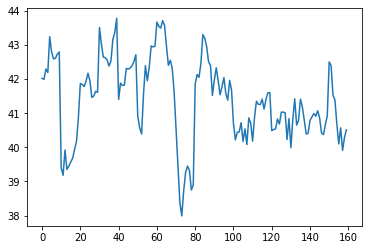

In [90]:
final_y=[]
for i in range(0,len(y_test),10):
    for j in range(0,10):
        final_y.append(y_test[i][j])
final_y=np.array(final_y)
print(final_y.shape)
plt.plot(final_y)
plt.show()

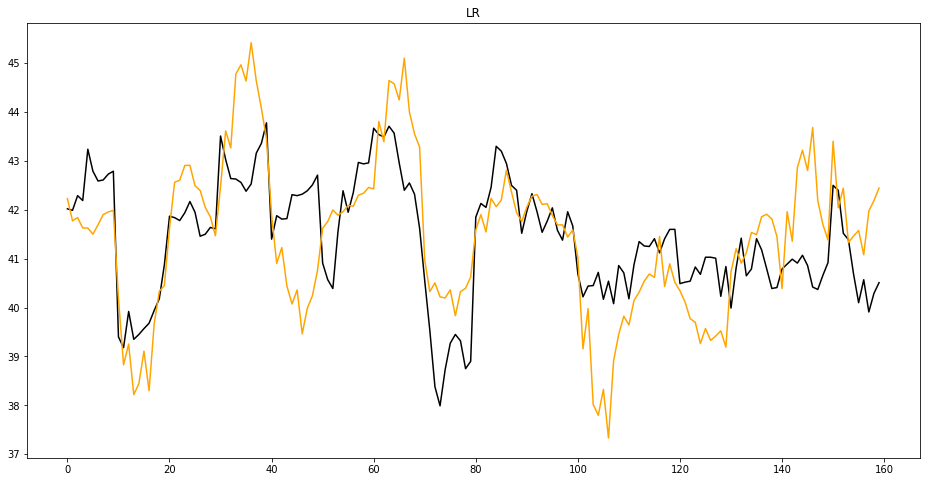

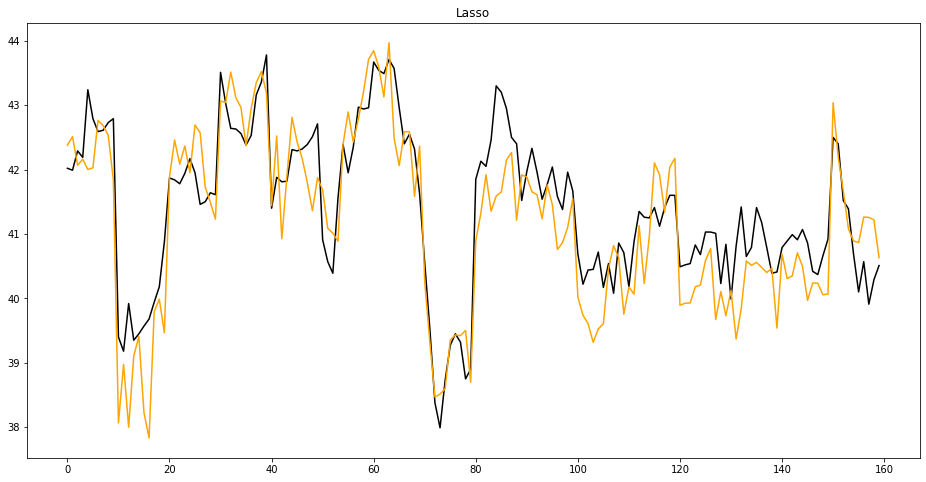

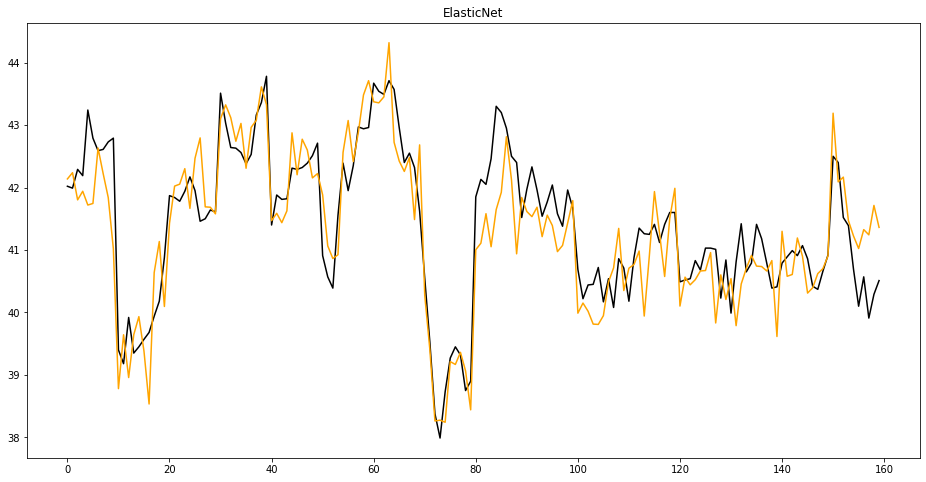

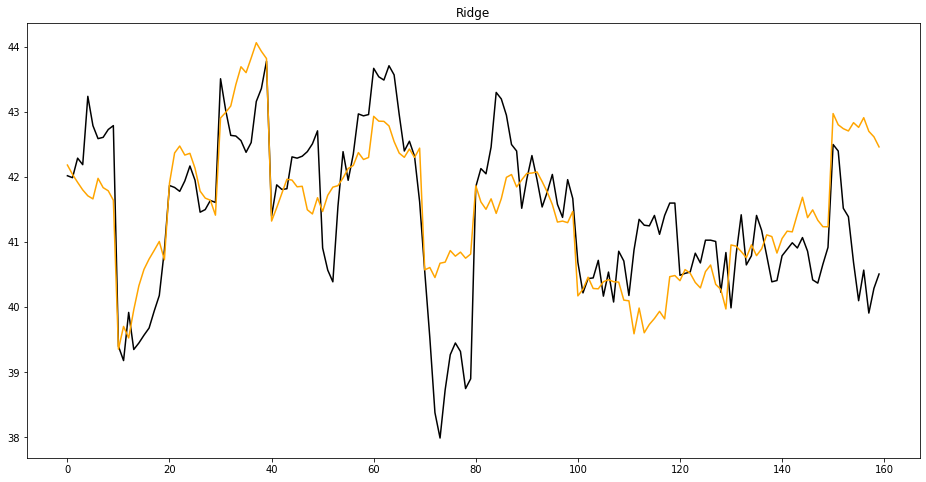

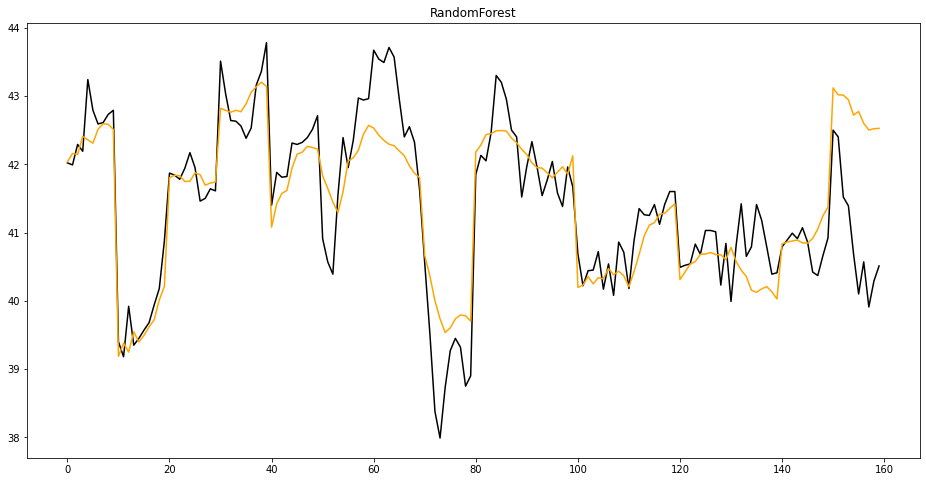

In [92]:
for name,model in models:
    predicted=prediction(model)
    plt.figure(figsize=(16,8))
    plt.title(name)
    plt.plot(final_y,label='Actual Data',color='black')
    plt.plot(predicted,label=name+'Predicted',color='orange')
    plt.show
    
    

# Sieć Neuronowa

In [93]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [94]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=0)

(602, 30, 7)


In [100]:
model = Sequential()


model.add(LSTM(105,activation='tanh',return_sequences=True,input_shape=(prediction_days,7)))
model.add(LSTM(45,activation='tanh',return_sequences=True))
model.add(LSTM(20,activation='tanh',return_sequences=True))
model.add(LSTM(10,activation='tanh'))
model.add(Dense(days_to_predict))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 105)           47460     
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 45)            27180     
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 20)            5280      
_________________________________________________________________
lstm_7 (LSTM)                (None, 10)                1240      
_________________________________________________________________
dense (Dense)                (None, 10)                110       
Total params: 81,270
Trainable params: 81,270
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [103]:
history=model.fit(X_train2,y_train2,epochs=30,batch_size=64)

Epoch 1/30
10/10 [==============================] - 1s 63ms/step - loss: 1644.8674
Epoch 2/30
10/10 [==============================] - 1s 61ms/step - loss: 1633.2933
Epoch 3/30
10/10 [==============================] - 1s 56ms/step - loss: 1620.8828
Epoch 4/30
10/10 [==============================] - 1s 56ms/step - loss: 1607.8635
Epoch 5/30
10/10 [==============================] - 1s 55ms/step - loss: 1594.3663
Epoch 6/30
10/10 [==============================] - 1s 55ms/step - loss: 1580.8959
Epoch 7/30
10/10 [==============================] - 1s 85ms/step - loss: 1567.7268
Epoch 8/30
10/10 [==============================] - 1s 84ms/step - loss: 1555.0493
Epoch 9/30
10/10 [==============================] - 1s 77ms/step - loss: 1542.9309
Epoch 10/30
10/10 [==============================] - 1s 56ms/step - loss: 1531.3207
Epoch 11/30
10/10 [==============================] - 1s 56ms/step - loss: 1520.1681
Epoch 12/30
10/10 [==============================] - 1s 56ms/step - loss: 1509.3837
E

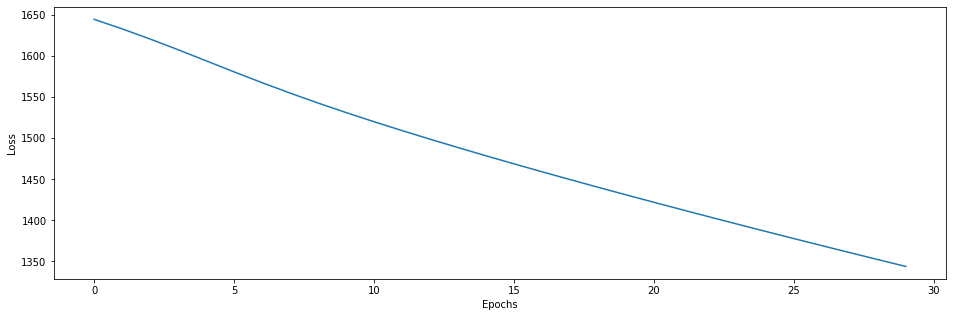

In [117]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [116]:
def deep_prediction(model):
    predictions=[]
    prediction=model.predict(X_test2)
    for i in range(0,len(prediction),10):
        for j in range(0,10):
            predictions.append(prediction[i][j])                
    predictions=np.array(predictions)
    return predictions

<function matplotlib.pyplot.show(close=None, block=None)>

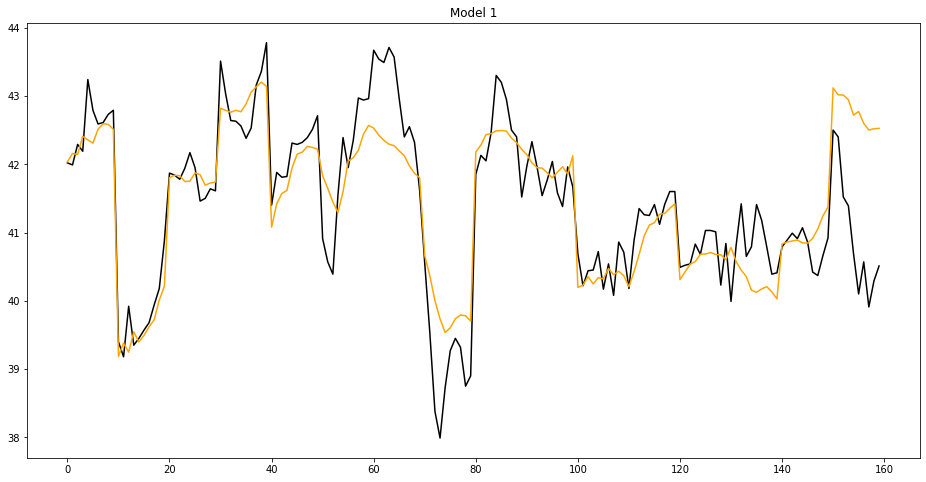

In [107]:
predictions=deep_prediction(model)
plt.figure(figsize=(16,8))
plt.title("Model 1")
plt.plot(final_y,label='Actual Data',color='black')
plt.plot(predicted,label='Predicted',color='orange')
plt.show

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
scaler= MinMaxScaler(feature_range=(0,1))
close_scaler=MinMaxScaler(feature_range=(0,1))

close_scale=close_scaler.fit(coca[['close']])
scaled_data=pd.DataFrame(scaler.fit_transform(coca),columns=coca.columns,index=coca.index)

In [124]:
X=[]
y=[]

prediction_days=30

days_to_predict=10

df_numpy=scaled_data.to_numpy()

for i in range(len(df_numpy)):
    end= i + prediction_days
    out_end= end + days_to_predict
    
    if(out_end>len(df_numpy)):
       break
    
    X.append(df_numpy[i:end, :])
    y.append(df_numpy[end:out_end,0])

       
X,y= np.array(X), np.array(y)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [180]:
X

array([[[0.21252562, 0.05725953, 0.        , ..., 0.91128336,
         0.93181773, 0.0092192 ],
        [0.19815191, 0.0572597 , 0.        , ..., 0.85091529,
         0.86818136, 0.02660714],
        [0.18172491, 0.05638703, 0.35094163, ..., 0.78406658,
         0.79545455, 0.03901544],
        ...,
        [0.25564697, 0.1649479 , 0.47581653, ..., 0.68743642,
         0.910004  , 0.14656265],
        [0.31108813, 0.18880601, 0.49867612, ..., 0.77396292,
         0.96598701, 0.16393424],
        [0.33162211, 0.18621217, 0.53114746, ..., 0.80255275,
         0.81818173, 0.1823162 ]],

       [[0.19815191, 0.0572597 , 0.        , ..., 0.85091529,
         0.86818136, 0.02660714],
        [0.18172491, 0.05638703, 0.35094163, ..., 0.78406658,
         0.79545455, 0.03901544],
        [0.07392206, 0.03956228, 0.33181276, ..., 0.4632083 ,
         0.31818182, 0.03230483],
        ...,
        [0.31108813, 0.18880601, 0.49867612, ..., 0.77396292,
         0.96598701, 0.16393424],
        [0.3

In [175]:
model = Sequential()

model.add(LSTM(60,activation='tanh',return_sequences=True,input_shape=(prediction_days,7)))
model.add(Dropout(0.2))
model.add(LSTM(30,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(10,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 30, 60)            16320     
_________________________________________________________________
dropout_37 (Dropout)         (None, 30, 60)            0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 30, 30)            10920     
_________________________________________________________________
dropout_38 (Dropout)         (None, 30, 30)            0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 10)                1640      
_________________________________________________________________
dropout_39 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)              

In [177]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [178]:
history=model.fit(X_train,y_train, epochs=50, batch_size=64,validation_data=(X_test,y_test))

Epoch 1/50
10/10 [==============================] - 12s 279ms/step - loss: 0.1704 - val_loss: 0.0936
Epoch 2/50
10/10 [==============================] - 1s 54ms/step - loss: 0.0939 - val_loss: 0.0638
Epoch 3/50
10/10 [==============================] - 1s 57ms/step - loss: 0.0779 - val_loss: 0.0485
Epoch 4/50
10/10 [==============================] - 1s 95ms/step - loss: 0.0674 - val_loss: 0.0386
Epoch 5/50
10/10 [==============================] - 1s 86ms/step - loss: 0.0594 - val_loss: 0.0310
Epoch 6/50
10/10 [==============================] - 1s 82ms/step - loss: 0.0479 - val_loss: 0.0262
Epoch 7/50
10/10 [==============================] - 1s 77ms/step - loss: 0.0488 - val_loss: 0.0261
Epoch 8/50
10/10 [==============================] - 0s 49ms/step - loss: 0.0384 - val_loss: 0.0251
Epoch 9/50
10/10 [==============================] - 1s 52ms/step - loss: 0.0418 - val_loss: 0.0198
Epoch 10/50
10/10 [==============================] - 1s 59ms/step - loss: 0.0377 - val_loss: 0.0175
Epoch 1

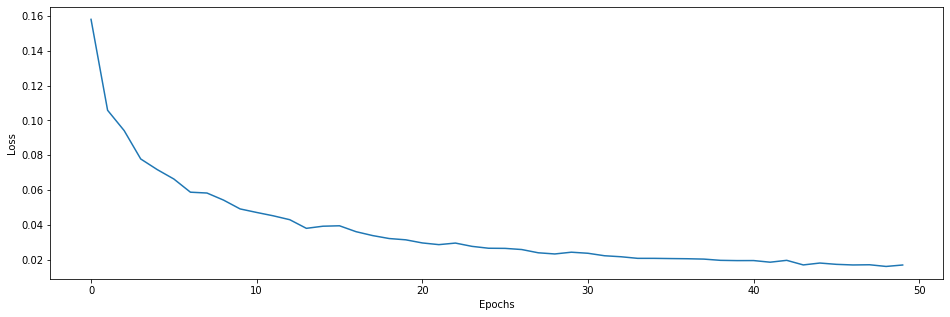

In [173]:
plt.figure(figsize=(16,5))
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [189]:
predictions=deep_prediction(model)
predictions=close_scaler.inverse_transform(predictions)
plt.figure(figsize=(16,8))
plt.title("Model 1")
plt.plot(final_y,label='Actual Data',color='black')
plt.plot(predictions,label='Predicted',color='orange')
plt.show

ValueError: Expected 2D array, got 1D array instead:
array=[0.8426497  0.8544378  0.8775754  0.8492868  0.6875523  0.61920303
 0.6584468  0.8386535  0.60488397 0.84972954 0.8426497  0.8544378
 0.8775754  0.8492868  0.6875523  0.61920303 0.6584468  0.8386535
 0.60488397 0.84972954 0.8426497  0.8544378  0.8775754  0.8492868
 0.6875523  0.61920303 0.6584468  0.8386535  0.60488397 0.84972954
 0.8426497  0.85443777 0.87757534 0.8492868  0.6875523  0.61920303
 0.65844685 0.8386535  0.60488397 0.84972954 0.8426497  0.8544378
 0.8775754  0.8492868  0.6875523  0.61920303 0.6584468  0.8386535
 0.60488397 0.84972954 0.8426497  0.8544378  0.8775754  0.8492868
 0.6875523  0.61920303 0.6584468  0.8386535  0.60488397 0.84972954
 0.8426497  0.8544378  0.8775754  0.8492868  0.6875523  0.61920303
 0.6584468  0.8386535  0.60488397 0.84972954 0.8426497  0.8544378
 0.8775754  0.8492868  0.6875523  0.61920303 0.6584468  0.8386535
 0.60488397 0.84972954 0.8426497  0.8544378  0.8775754  0.8492868
 0.6875523  0.61920303 0.6584468  0.8386535  0.60488397 0.84972954
 0.8426497  0.8544378  0.8775754  0.8492868  0.6875523  0.61920303
 0.6584468  0.8386535  0.60488397 0.84972954 0.8426497  0.8544378
 0.8775754  0.8492868  0.6875523  0.61920303 0.6584468  0.8386535
 0.60488397 0.84972954 0.8426497  0.8544378  0.8775754  0.8492868
 0.6875523  0.61920303 0.6584468  0.8386535  0.60488397 0.84972954
 0.8426497  0.8544378  0.8775754  0.8492868  0.6875523  0.61920303
 0.6584468  0.8386535  0.60488397 0.84972954 0.8426497  0.8544378
 0.8775754  0.8492868  0.6875523  0.61920303 0.6584468  0.8386535
 0.60488397 0.84972954 0.8426497  0.8544378  0.8775754  0.8492868
 0.6875523  0.61920303 0.6584468  0.8386535  0.60488397 0.84972954
 0.8426497  0.8544378  0.8775754  0.8492868  0.6875523  0.61920303
 0.6584468  0.8386535  0.60488397 0.84972954].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.